<a href="https://colab.research.google.com/github/alanfmorato/consumption-predictability/blob/main/Cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Framework de Ciência de Dados

Neste projeto utilizaremos o CRISP-DM (Cross-Industry Standard Process for Data Mining) que é uma metodologia amplamente utilizada para guiar projetos de mineração de dados. Ela envolve seis fases principais: compreensão do negócio, compreensão dos dados, preparação dos dados, modelagem, avaliação e implantação. O CRISP-DM fornece uma estrutura flexível e iterativa para auxiliar na extração de conhecimento valioso a partir de conjuntos de dados, permitindo tomadas de decisão informadas.

###Business Understanding
Neste projeto precisamos através dos dados disponibilizados prever o consumo de cerveja ao longo do tempo de acordo com algumas variáveis.

###Data Understanding
Para trabalhar temos os seguintes dados:

**data - Data**

**temp_media - Temperatura média (ºc)**

**temp_min - Temperatura mínima (ºc)**

**temp_max - Temperatura máxima (ºc)**

**chuva - Preciptação (mm)**

**fds - Final de Semana ( 1 = sim; 0 = não)**

**consumo - Consumo em litros**

##Data Understanding

In [3]:
#Para ler um dataset podemos utilizar pandas: pd.read_csv("caminho do arquivo")

df = pd.read_csv("/content/drive/MyDrive/Data Studies/Regressão/Regressão linear: testando relações e prevendo resultados/Consumo_cerveja.csv", sep = ';')

In [4]:
#Para visualizar o dataset, podemos utilizar a função .head() que mostra as primeiras 5 linhas do dataset
#caso queira mais linhas é só colocar a quantidade entre os ()

df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


A função describe() do Pandas é usada para obter estatísticas descritivas de um DataFrame ou de uma série de dados. Ela fornece informações resumidas sobre os principais aspectos dos dados, como média, desvio padrão, quartis, mínimo e máximo. Aqui estão as estatísticas geradas pela função describe():

    Contagem (count): número de valores não nulos presentes na coluna.
    Média (mean): média aritmética dos valores.
    Desvio padrão (std): medida de dispersão dos valores em relação à média.
    Valor mínimo (min): menor valor presente na coluna.
    Quartis (25%, 50%, 75%): valores que dividem os dados em quatro partes iguais. O quartil 50% é igual à mediana.
    Valor máximo (max): maior valor presente na coluna.

Para incluir colunas categóricas podemos utilizar o `df.describe(include=['O'])`

In [5]:
#Vamos analisar o dataset com o describe()
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


A correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas. Ela mede a força e a direção dessa relação, variando de -1 a +1.

Um coeficiente de correlação de Pearson igual a +1 indica uma correlação positiva perfeita, o que significa que as duas variáveis têm uma relação linear positiva, ou seja, à medida que uma variável aumenta, a outra também aumenta de maneira proporcional. Por exemplo, se estivermos analisando a altura e o peso de indivíduos, uma correlação positiva perfeita indicaria que, em média, pessoas mais altas tendem a ser mais pesadas.

Um coeficiente de correlação de Pearson igual a -1 indica uma correlação negativa perfeita, o que significa que as duas variáveis têm uma relação linear negativa, ou seja, à medida que uma variável aumenta, a outra diminui de maneira proporcional. Por exemplo, se estivermos analisando a quantidade de estudo e o nível de ansiedade de estudantes, uma correlação negativa perfeita indicaria que, em média, à medida que a quantidade de estudo aumenta, o nível de ansiedade tende a diminuir.


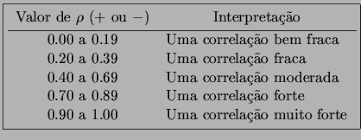

In [6]:
df.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


In [7]:
sns.set_palette("rocket_r")
sns.set_style("darkgrid")

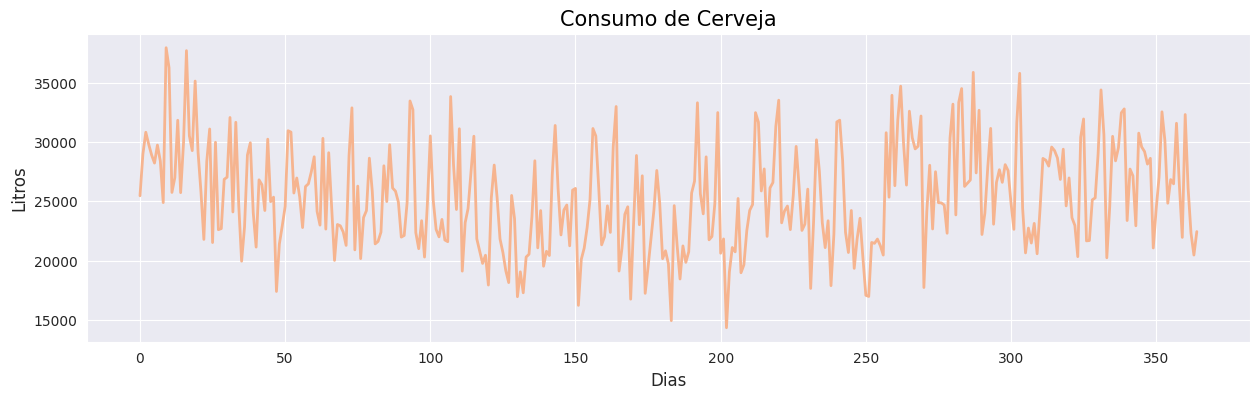

In [8]:
fig, ax = plt.subplots(figsize = (15,4))
#Aqui estamos setando qual será o título do gráfico, o tamanho da fonte e a cor do texto.
#Podemos utilizar o site https://www.geeksforgeeks.org/matplotlib-pyplot-title-in-python/ para ver o exemplo
ax.set_title("Consumo de Cerveja", fontsize= 15, color = "black")
#Nesta linha estamos realizando a nomenclatura do eixo y e x
ax.set_ylabel('Litros', fontsize= 12)
ax.set_xlabel('Dias', fontsize= 12)
#Nesta linha estamos plotando o consumo
ax = df['consumo'].plot(linestyle='solid', linewidth=2)

**Explicação do Box-Plot**

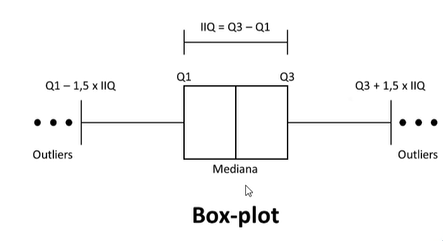

Text(0.5, 1.0, 'Consumo de Cerveja')

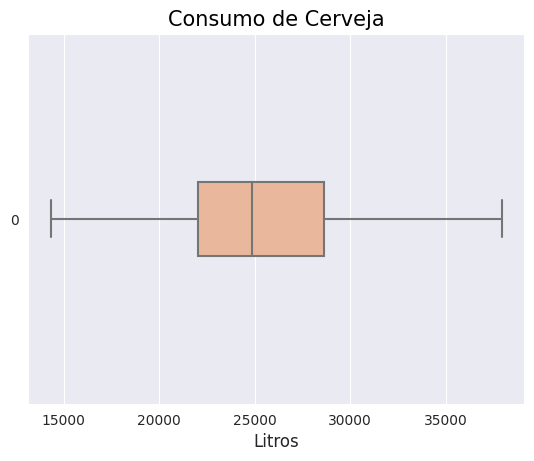

In [9]:
#Criação do box-plot
ax = sns.boxplot(data = df['consumo'], orient = 'h', width=0.2)
ax.set_xlabel('Litros', fontsize= 12)
ax.set_title("Consumo de Cerveja", fontsize= 15, color = "black")

Text(0.5, 1.0, 'Consumo de Cerveja')

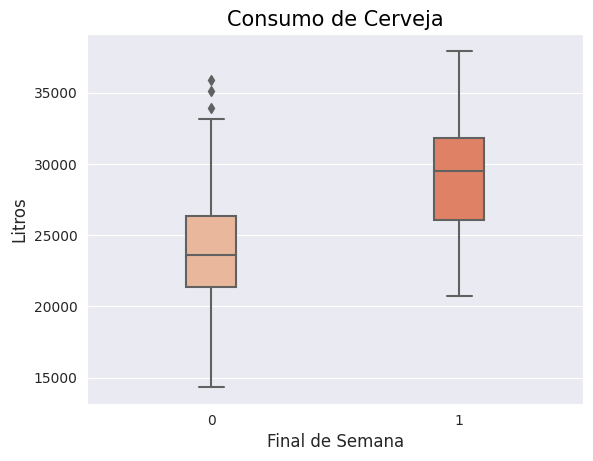

In [10]:
#Criação do box-plot com duas variáveis
ax = sns.boxplot(y = 'consumo', x = 'fds', data = df, orient = 'v', width=0.2)
ax.set_xlabel('Final de Semana', fontsize= 12)
ax.set_ylabel('Litros', fontsize= 12)
ax.set_title("Consumo de Cerveja", fontsize= 15, color = "black")

Para verificar se a curva é normal, podemos plotar o gráfico distplot da seaborn e também podemos analisar se a média está próxima a mediana no describe, caso esteja então a distribuição é normal

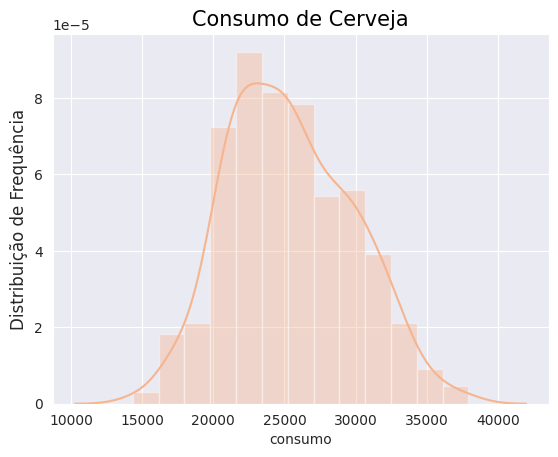

In [11]:
#Distribuição normal da variável consumo
ax = sns.distplot(df['consumo']);
ax.set_ylabel('Distribuição de Frequência', fontsize= 12);
ax.set_title("Consumo de Cerveja", fontsize= 15, color = "black");

##Data Preparation

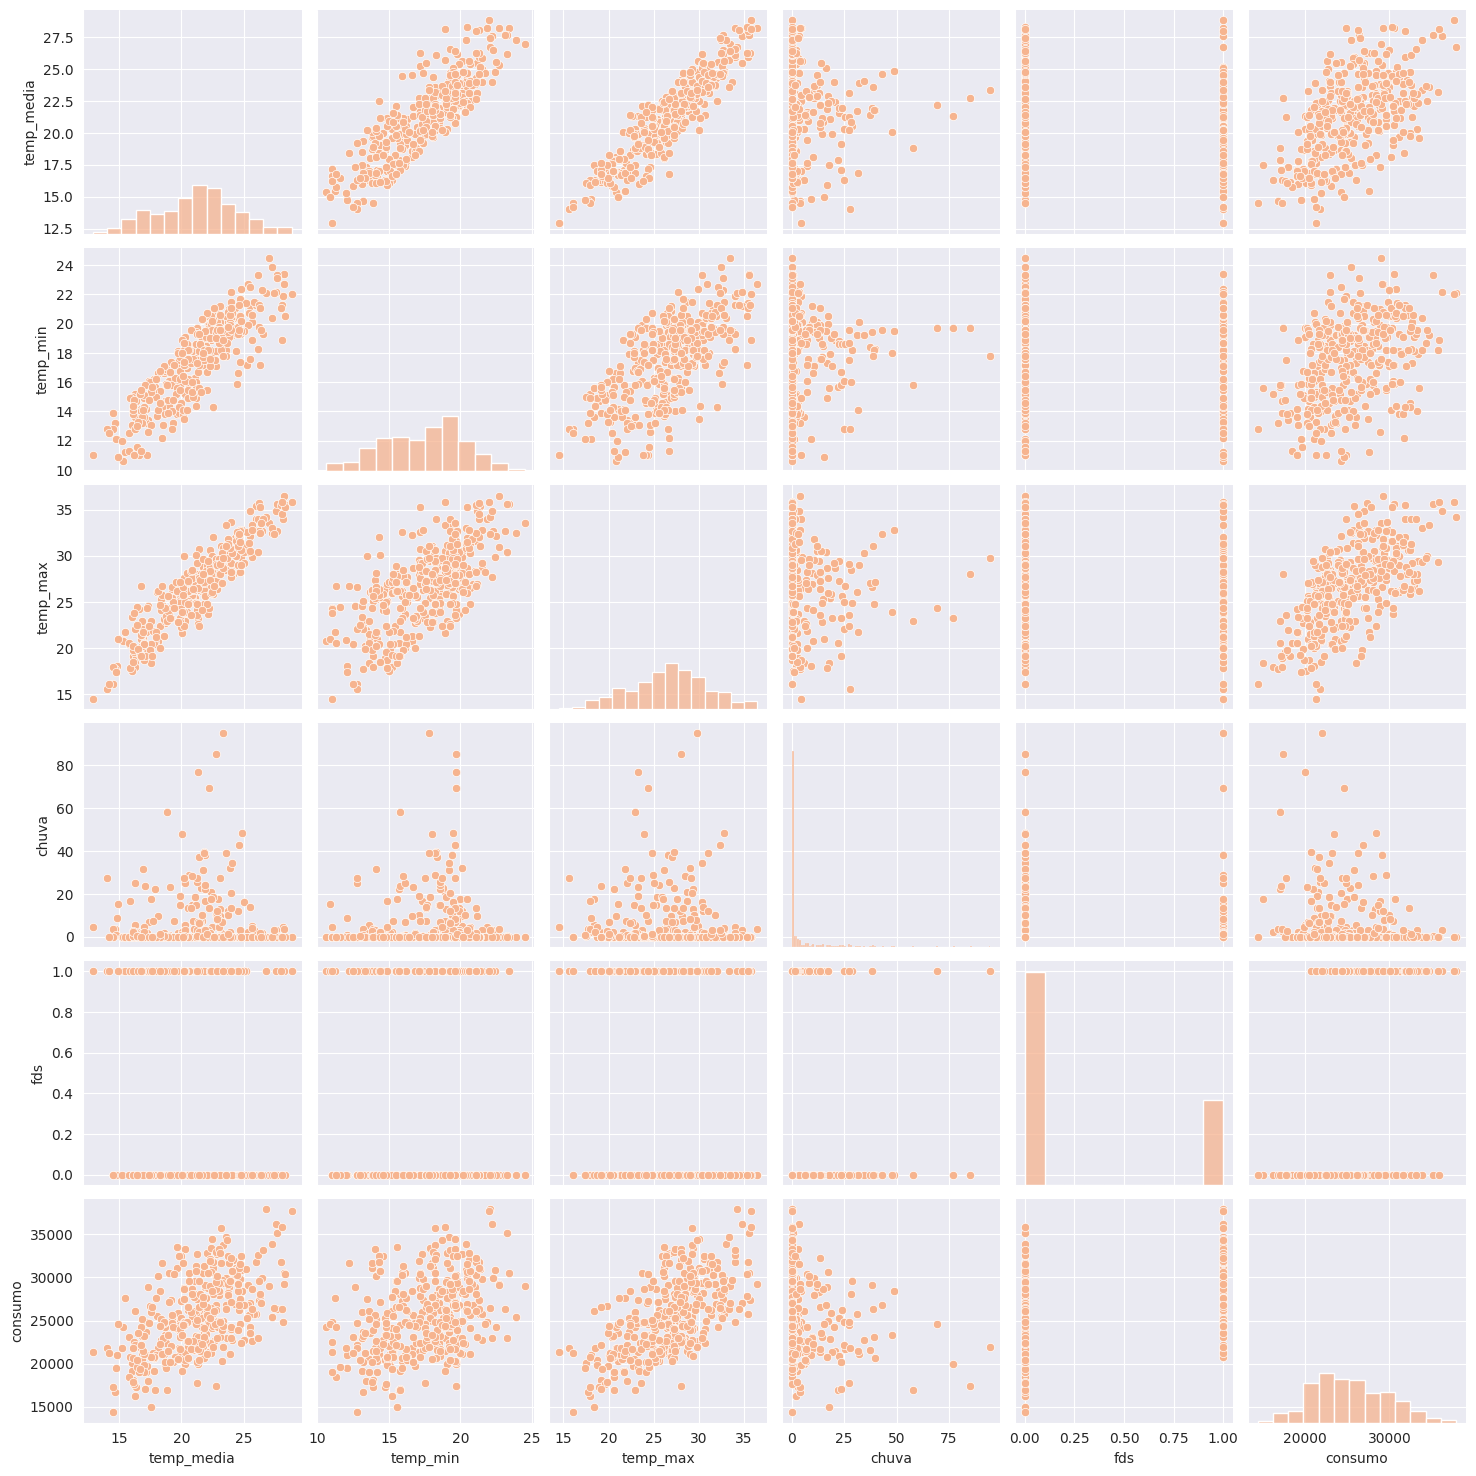

In [12]:
#O pairplot é uma função de visualização utilizada para entender a correlação entre os dados

ax = sns.pairplot(df)

Conforme a imagem abaixo, conseguimos supor que temp_max é a variável que mais tem correlação com a variável y


Text(0.5, 1.1, 'Dispersão entre variáveis')

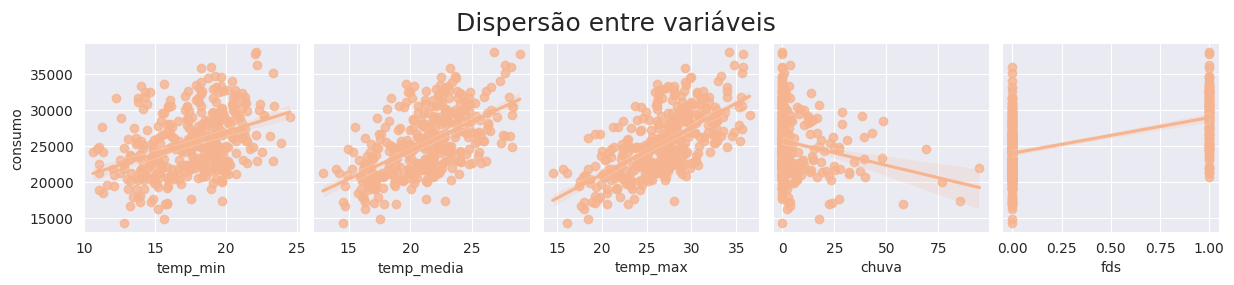

In [13]:
#Pars visualizar com maior segurança e maior eficácia, podemos utilizar a o pairplot aplicado nas variáveis que fazem mais sentido

ax = sns.pairplot(df, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize = 18, y=1.1)

Text(0.5, 1.1, 'Consumo x Temperatura Máxima')

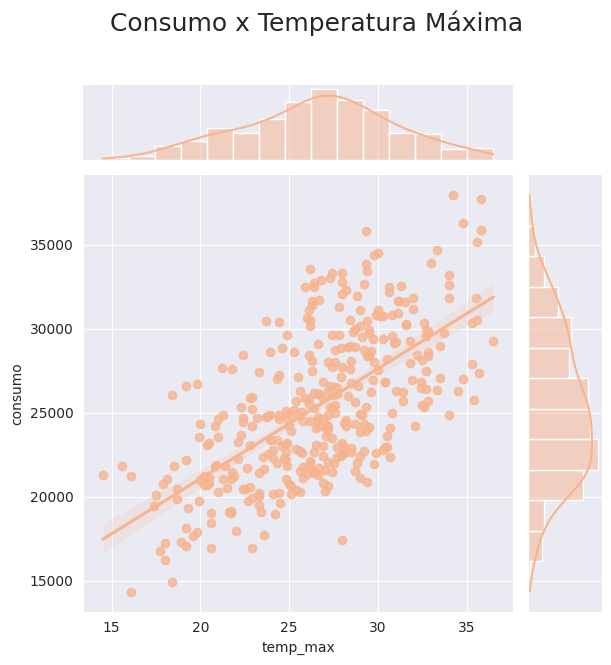

In [14]:
#verificando a distribuição dos dados

ax = sns.jointplot(x = 'temp_max', y= 'consumo', data = df, kind='reg')
ax.fig.suptitle('Consumo x Temperatura Máxima', fontsize = 18, y=1.1)

Text(0.5, 1.1, 'Consumo x Temperatura Máxima')

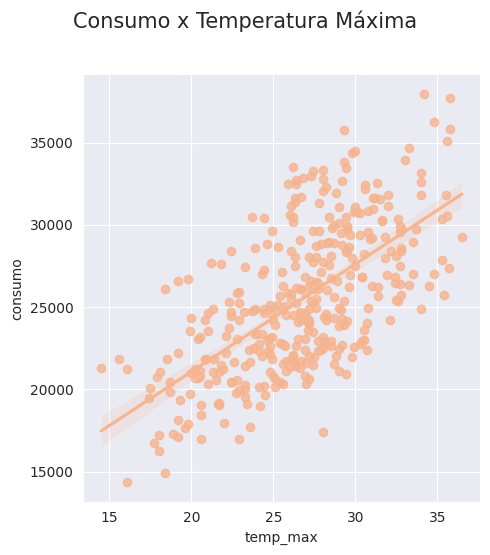

In [15]:
#verificando a distribuição dos dados

ax = sns.lmplot(x = 'temp_max', y= 'consumo', data = df)
ax.fig.suptitle('Consumo x Temperatura Máxima', fontsize = 15, y=1.1)

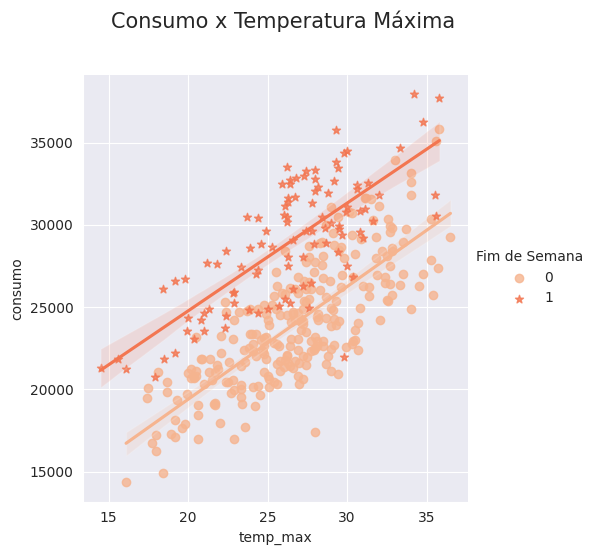

In [16]:
#verificando a distribuição dos dados com uma terceira variável

ax = sns.lmplot(x = 'temp_max', y= 'consumo', data = df, hue = 'fds', markers = ['o', '*'], legend = False)
ax.fig.suptitle('Consumo x Temperatura Máxima', fontsize = 15, y=1.1)
ax.add_legend(title = 'Fim de Semana')

##Modelagem


In [17]:
#Variável Principal
y = df['consumo']

In [18]:
#Variáveis explicativas, nosso modelo de regressão é multiplo devido a quantidade de variaveis explicativas
X = df[['temp_max', 'chuva', 'fds']]

In [19]:
#Aqui estamos atribuindo valores com o train test split as variáveis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=2011)

In [20]:
X_train.shape

(255, 3)

In [21]:
X_test.shape

(110, 3)

In [22]:
y_train.shape

(255,)

In [23]:
y_test.shape

(110,)

In [24]:
#Instanciando a classe

modelo = LinearRegression()

In [25]:
#Estimando o modelo

modelo.fit(X_train, y_train)

LinearRegression()

In [26]:
#Calculando o coeficiente de determinação

print('R^2 = {} '.format(modelo.score(X_train, y_train).round(2)))

R^2 = 0.73 


In [27]:
#Calculando valores futuros com os dados de teste

y_previsto = modelo.predict(X_test)

In [28]:
#Calculando o coeficiente de determinação para o y_test

print('R^2 = %s '% metrics.r2_score(y_test,y_previsto).round(2))

R^2 = 0.69 


In [29]:
entrada = X_test[0:1]

In [30]:
modelo.predict(entrada)[0]

21531.189280542116

In [31]:
temp_max = 40
chuva = 0
fds = 1
entrada=[[temp_max, chuva, fds]]

print("{} Litros".format(modelo.predict(entrada)[0].round(2)))

38785.14 Litros


##Evaluation

Vamos calcular o Intercepto (Representa o efeito médio em Y tendo todas as variáveis explicativas sendo excluídas)

In [32]:
modelo.intercept_

5814.671864020827

In [33]:
type(modelo.intercept_)

numpy.float64

In [34]:
modelo.coef_

array([ 692.35759544,  -52.19060779, 5276.16588924])

In [35]:
type(modelo.coef_)

numpy.ndarray

In [36]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [37]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva', 'Final de Semana']

**Intercepto** -> Quanto vamos consumir sem depender das outras variáveis

**Temperatura máxima** -> A cada um grau adicionado, matendo as outras variaveis, temos um acrescimo de 692 litros de cerveja

**Chuva** -> A cada um mm de chuva adicionado, matendo as outras variaveis, temos um acrescimo de -52 litros de cerveja

**Final de Semana** -> matendo as outras variaveis, se for final de semana temos um acrescimo de -5276 litros de cerveja

In [38]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,5814.671864
Temperatura Máxima,692.357595
Chuva,-52.190608
Final de Semana,5276.165889


In [39]:
y_previsto_train = modelo.predict(X_train)

Text(0.5, 1.1, 'Consumo x Temperatura Máxima')

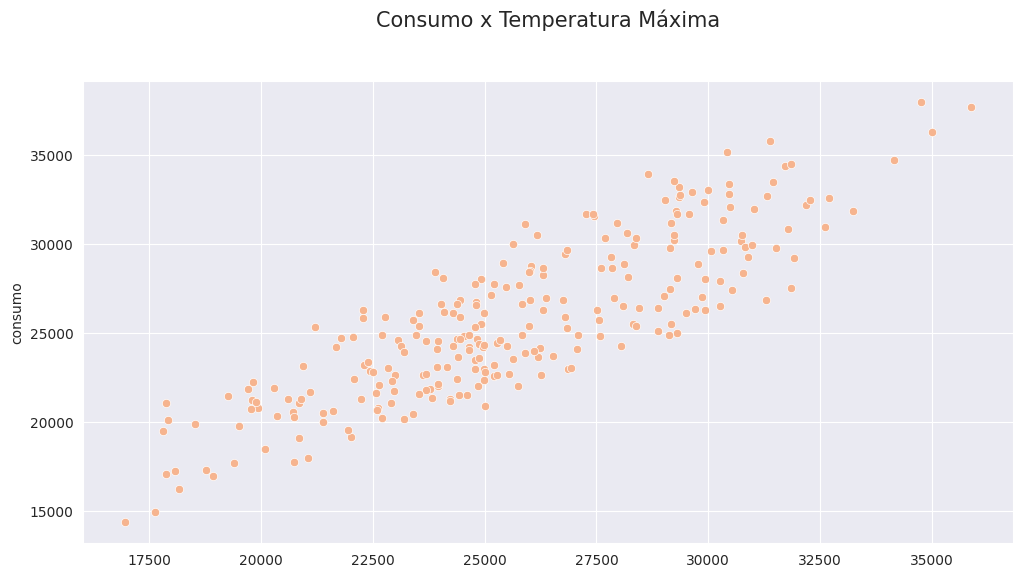

In [40]:
#Identificando o comportamento do nosso modelo

ax = sns.scatterplot(x = y_previsto_train,  y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo x Temperatura Máxima', fontsize = 15, y=1.1)

In [41]:
residuo = y_train - y_previsto_train

Text(0.5, 1.1, 'Resíduo x Previsão')

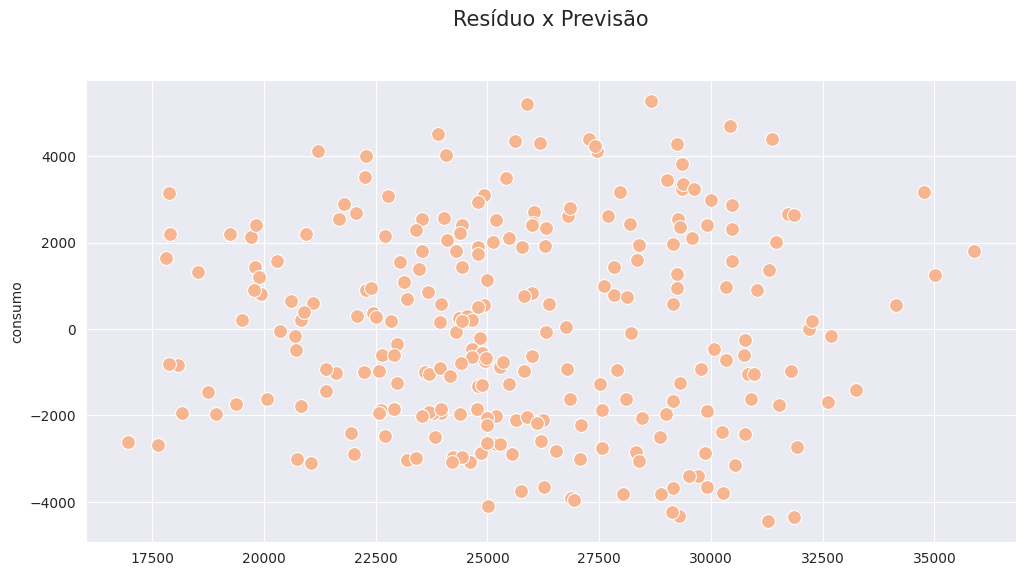

In [42]:
#Identificando o comportamento do nosso modelo x resíduo

ax = sns.scatterplot(x = y_previsto_train,  y = residuo, s=100)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduo x Previsão', fontsize = 15, y=1.1)

Text(0.5, 1.1, 'distribuição residuos')

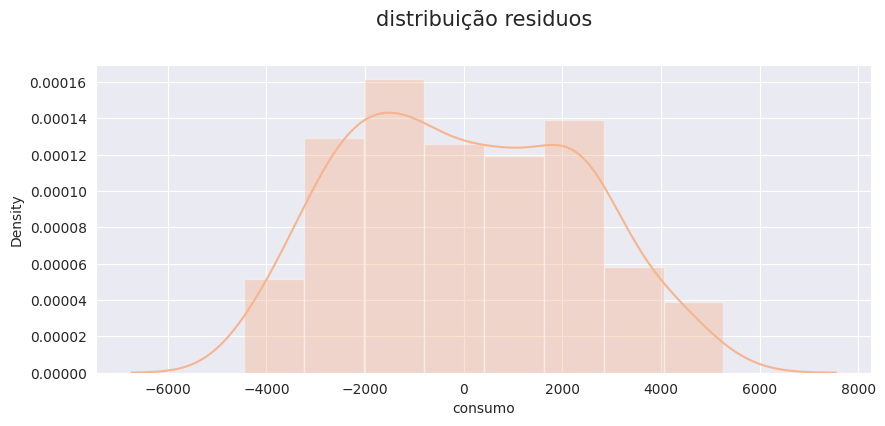

In [43]:
#Distribuição de frequência dos resíduos

ax = sns.distplot(residuo)
ax.figure.set_size_inches(10,4)
ax.set_title('distribuição residuos', fontsize = 15, y=1.1)